In [1]:
import cv2

In [2]:
from deepface import DeepFace

Using TensorFlow backend.


In [3]:
img=cv2.imread('boy1.jpg')

In [4]:
import matplotlib.pyplot as plt

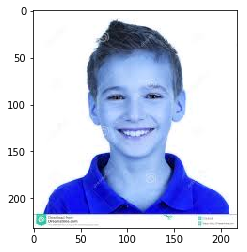

In [5]:
plt.imshow(img)

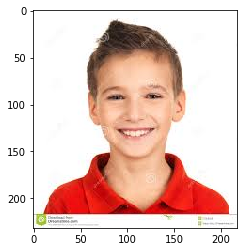

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
predictions=DeepFace.analyze(img)







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.37s/it]


In [8]:
predictions


{'emotion': {'angry': 5.624516965455767e-12,
  'disgust': 5.5051261971735495e-15,
  'fear': 5.580851059061587e-09,
  'happy': 99.99998807907104,
  'sad': 1.7791625377822085e-10,
  'surprise': 1.2597156390931064e-10,
  'neutral': 1.3766430129180662e-05},
 'dominant_emotion': 'happy',
 'age': 23.250612343773945,
 'gender': 'Man',
 'race': {'asian': 0.08192279887024151,
  'indian': 0.6284064431078962,
  'black': 0.024854476266887936,
  'white': 55.99435639314132,
  'middle eastern': 25.690519892039287,
  'latino hispanic': 17.579942057125812},
 'dominant_race': 'white'}

In [9]:
type(predictions)

dict

In [10]:
predictions['dominant_emotion']

'happy'

In [11]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [12]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w, y+h),(0,255,0),2)

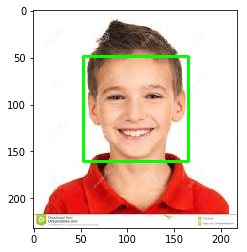

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 
            predictions['dominant_emotion'],
            (0,50),
            font,1,
            (0,0,255),
            2,
            cv2.LINE_4);

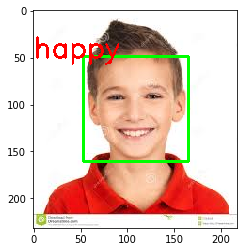

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
img=cv2.imread('boy6.jpg')

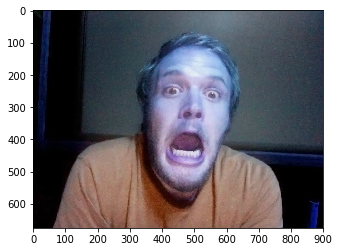

In [17]:
plt.imshow(img)

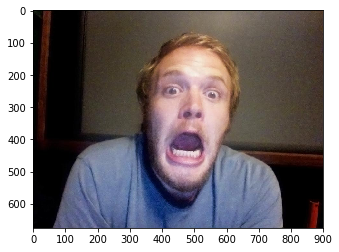

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
predictions=DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.34s/it]


In [20]:
predictions

{'emotion': {'angry': 0.01168656162917614,
  'disgust': 1.9830965758416141e-07,
  'fear': 77.37728357315063,
  'happy': 0.019479285401757807,
  'sad': 0.0009786082955542952,
  'surprise': 22.590063512325287,
  'neutral': 0.0005068042355560465},
 'dominant_emotion': 'fear',
 'age': 34.32146238107069,
 'gender': 'Man',
 'race': {'asian': 0.48620122276828015,
  'indian': 0.25209094652194425,
  'black': 0.02616519320370189,
  'white': 75.91952372556642,
  'middle eastern': 7.907250326007566,
  'latino hispanic': 15.408764432815977},
 'dominant_race': 'white'}

In [21]:
predictions['dominant_emotion']

'fear'

In [22]:
##DEMO FOR WEBCAM

In [23]:
import cv2
from deepface import DeepFace

faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open webcam")

while True:
    ret,frame=cap.read()
    result=DeepFace.analyze(frame,actions=['emotion'])
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,255,0),2)
        
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame,
               result['dominant_emotion'],
               (50,50),
               font,3,
               (0,0,255),
               2,
               cv2.LINE_4)
    cv2.imshow('Demo Video',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
                
    

ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.